<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


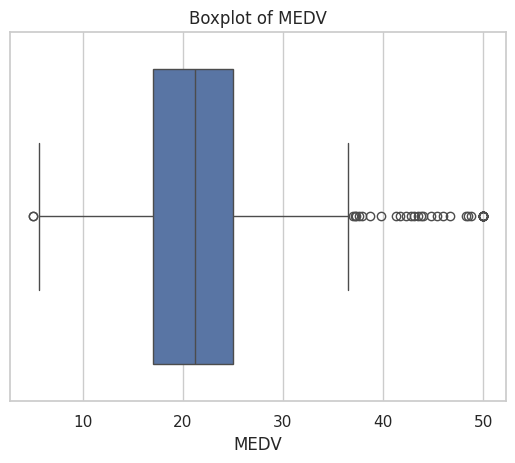

In [48]:
# Visualization 1
ax1 = sns.boxplot(x='MEDV', data=boston_df)
pyplot.title("Boxplot of MEDV")
pyplot.show()

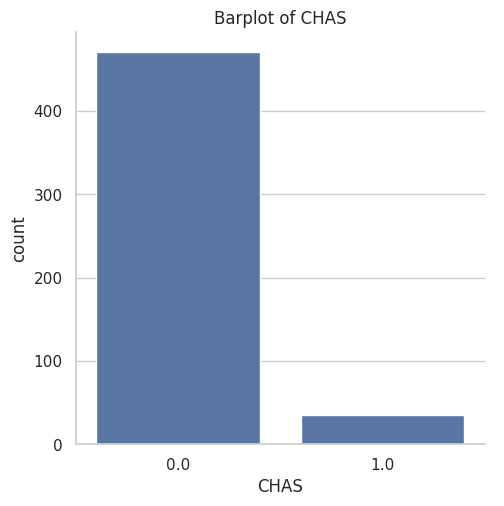

In [49]:
# Visualization 2
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title("Barplot of CHAS")
pyplot.show()

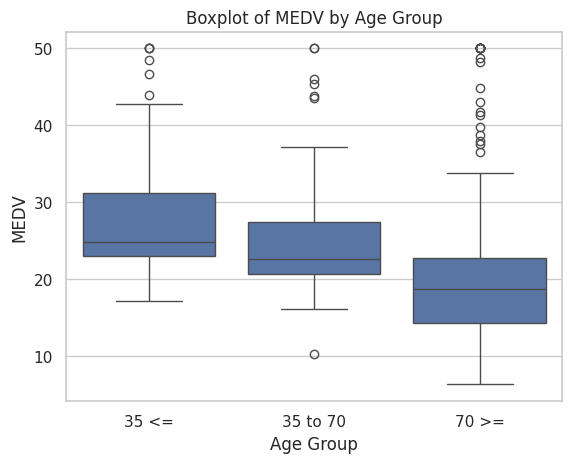

In [50]:
# Visualization 3

# Discretize the 'AGE' variable
boston_df['Age_Group'] = pd.cut(boston_df['AGE'],
                                bins=[0, 35, 70, 100],  # Adjust upper bin if needed to cover max age
                                labels=['35 <=', '35 to 70', '70 >='],
                                right=False)  # Adjust whether to include the right edge or not


# Create the boxplot
ax3 = sns.boxplot(x="Age_Group", y="MEDV", data=boston_df)
pyplot.title("Boxplot of MEDV by Age Group")
pyplot.xlabel("Age Group")
pyplot.ylabel("MEDV")
pyplot.show()



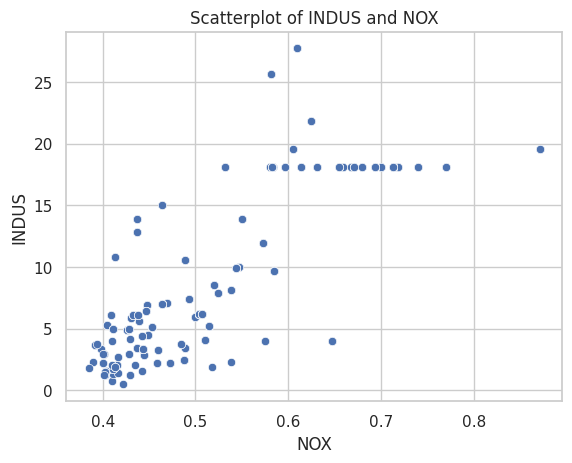

In [51]:
ax4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Scatterplot of INDUS and NOX")
pyplot.show()

# A positive relationship




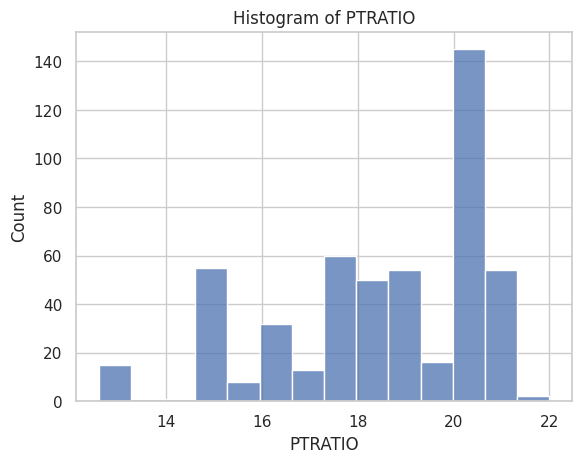

In [52]:
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title("Histogram of PTRATIO")
pyplot.show()


### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [38]:
import pandas as pd
from scipy import stats

# Example loading data - ensure your dataframe is loaded correctly
# boston_df = pd.read_csv('path_to_your_boston_dataset.csv')

# Segmenting the data
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Performing the t-test
t_stat, p_value = stats.ttest_ind(chas_1, chas_0, equal_var=False)

# Output the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Since the p-value is smaller than 0.05, we will reject the null hypothesis. There is significant evidence to suggest that properties adjacent to the Charles River have a higher median value compared to those that are not adjacent. 

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [54]:
age_groups = []

for age in boston_df['AGE'].unique():

    age_groups.append(boston_df[boston_df['AGE'] == age]['MEDV'])

fstatistic, pvalue = scipy.stats.f_oneway(*age_groups)

print('fstatistic', fstatistic)

print('pvalue' , pvalue)

# No, P-value > 0.05

fstatistic 0.9840091646131573
pvalue 0.5539698276810093


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [45]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Yes, P-valie > 0.05

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [46]:
X = sm.add_constant(boston_df['DIS'])  # Independent variable (weighted distances)
Y = boston_df['MEDV']  # Dependent variable (median home values)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print the summary of the regression
print(model.summary())

# ANSWER:  1.0916

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.21e-08
Time:                        19:50:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0